# Trabajo Práctico Análisis de Datos

## Librerías

In [643]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Dataset: Full TMDB Movies Dataset 2024 (Version 685 - 05/09/2025)

### Descripción del dataset

Es el dataset completo generado desde TMDb (The Movie Database). TMDb es una base de datos de películas completa que proporciona información sobre mas de 1M de peliculas desde 1916 hasta la actualidad.

Posee las 24 variable mostradas a continuación

Nro | Variable            | Tipo      | Descripción                                                                      |
----|---------------------|-----------|----------------------------------------------------------------------------------|
01  | id                  | int       | Identificador único de cada película.                                            |
02  | title               | str       | Título de la película.                                                           |
03  | vote_average        | float     | Promedio de votos o calificación otorgada por los espectadores.                  |
04  | vote_count          | int       | Cantidad total de votos recibidos por la película.                               |
05  | status              | str       | El estado de la película (p. ej., Lanzada, Rumoreada, En postproducción, etc).   |
06  | release_date        | str       | Fecha en que la película fue estrenada.                                          |
07  | revenue             | int       | Recaudación total generada por la película.                                      |
08  | runtime             | int       | Duración de la película en minutos.                                              |
09  | adult               | bool      | Indica si la película es apta solo para audiencias adultas.                      |
10  | backdrop_path       | str       | URL de la imagen de fondo de la película.                                        |
11  | budget              | int       | Presupuesto asignado para la película.                                           |
12  | homepage            | str       | URL de la página oficial de la película                                          |
13  | imdb_id             | str       | ID de IMDb de la película.                                                       |
14  | original_language   | str       | Idioma original en el que se produjo la película.                                |
15  | original_title      | str       | Título original de la película.                                                  |
16  | overview            | str       | Descripción breve o sinopsis de la película.                                     |
17  | popularity          | float     | Puntuación de popularidad de la película.                                        |
18  | poster_path         | str       | URL de la imagen del póster de la película.                                      |
19  | tagline             | str       | Eslogan o frase memorable asociada con la película.                              |
20  | genres              | str       | Lista de géneros a los que pertenece la película.                                |
21  | production_companies| str       | Lista de compañías productoras involucradas en la película.                      |
22  | production_countries| str       | Lista de países involucrados en la producción de la película.                    |
23  | spoken_languages    | str       | Lista de idiomas hablados en la película.                                        |
24  | keywords            | str       | Lista de palabras clave asociadas con la película.                               |

### Objetivo: Evaluar distintos modelos de clasificación para predecir la categoría de popularidad de una película

**Popularity** representa una medida relativa de interés del público hacia una película. Es un puntaje calculado por TMDb que refleja cuán popular es una película en la plataforma, basado en su actividad de usuarios.

TMDb no publica la fórmula exacta (es propietaria), pero la comunidad ha documentado que combina los siguientes factores:

|Factor | Descripción |
|-------|-------------|
|Número de votos (vote_count)|	Cuántos usuarios calificaron la película |
|Promedio de votos (vote_average)|	Qué tan alta es la calificación |
|Recencia|	Cuánto tiempo pasó desde el lanzamiento (películas nuevas tienden a tener más tráfico)|
|Tráfico / vistas / búsquedas|	Cuántas veces fue vista o accedida en TMDb recientemente|

Para este trabajo, se establecieron como objetivo tres rangos de popularidad:

| Clase | Rango de Popularidad | Interpretación |
|--------|------------------------|----------------|
| **0 — Baja** | 0 - 1 | Películas con poca o nula atención. |
| **1 — Media** | 1 - 10 | Películas conocidas o con cierto éxito. |
| **2 — Alta** | > 10 | Películas muy populares o éxitos de taquilla. |

## Carga del Dataset

In [644]:
!pip install kagglehub --quiet

# Fuerza a KaggleHub a volver a descargar la versión correcta
dir = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")
name = os.listdir(dir)[0]
path = os.path.join(dir, name)

print("Dataset descargado en:", path)


Dataset descargado en: C:\Users\tincho\.cache\kagglehub\datasets\asaniczka\tmdb-movies-dataset-2023-930k-movies\versions\722\TMDB_movie_dataset_v11.csv


In [ ]:
# Lectura segura del CSV (sin conflictos de opciones)
df = pd.read_csv(path, on_bad_lines='skip')

# Confirmamos
print("✅ Dataset cargado correctamente")
print(f"📊 Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

In [ ]:
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302236 entries, 0 to 1302235
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1302236 non-null  int64  
 1   title                 1302220 non-null  object 
 2   vote_average          1302236 non-null  float64
 3   vote_count            1302236 non-null  int64  
 4   status                1302236 non-null  object 
 5   release_date          1042768 non-null  object 
 6   revenue               1302236 non-null  int64  
 7   runtime               1302236 non-null  int64  
 8   adult                 1302236 non-null  bool   
 9   backdrop_path         332798 non-null   object 
 10  budget                1302236 non-null  int64  
 11  homepage              135405 non-null   object 
 12  imdb_id               641856 non-null   object 
 13  original_language     1302236 non-null  object 
 14  original_title        1302220 non-

## Preprocesamiento

Se eliminan observaciones duplicadas.

In [ ]:
# Cantidad de datos duplicados
print("Cantidad de datos duplicados:", df.duplicated().sum())

# Borro todas las duplicadas que tienen el mismo título y release_date
df = df.drop_duplicates(subset=['title', 'release_date'], keep='first')

# Verifico que no hayan quedado duplicados
print("Duplicados restantes:", df.duplicated(subset=['title', 'release_date']).sum())
print(f"Observaciones: {df.shape[0]} | Características: {df.shape[1]}")

Cantidad de datos duplicados: 377
Duplicados restantes: 0
Observaciones: 1279696 | Características: 24


Se convierte 'release_date' a formato DateTime

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_date"] = df["release_date"].replace({pd.NaT: np.nan})
df["release_date"].dtypes

dtype('<M8[ns]')

Se reemplazan ceros por nan en variables numericas

In [ ]:
# Reemplazo ceros por NaN en columnas específicas
cols = ["revenue", "budget", "runtime"]
df[cols] = df[cols].replace(0, np.nan)

## Análisis del target

Descripción de Popularity

In [ ]:
df['popularity'].describe()

count    1.279696e+06
mean     1.113312e+00
std      7.159543e+00
min      0.000000e+00
25%      6.000000e-01
50%      6.000000e-01
75%      8.400000e-01
max      2.994357e+03
Name: popularity, dtype: float64

Histograma de popularity

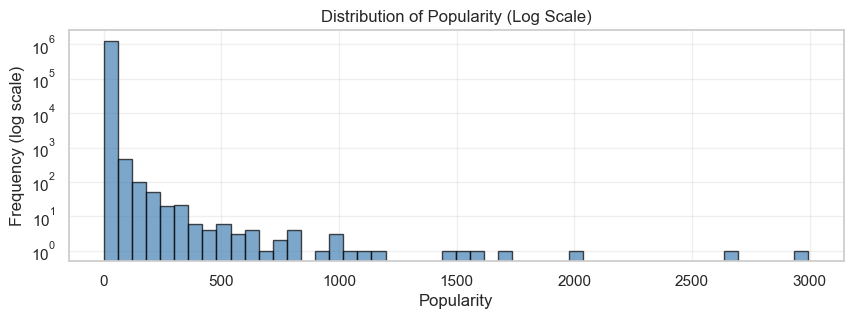

,title,popularity,release_date,vote_average,vote_count
0,Inception,83.952,2010-07-15,8.364,34495
1,Interstellar,140.241,2014-11-05,8.417,32571
2,The Dark Knight,130.643,2008-07-16,8.512,30619
3,Avatar,79.932,2009-12-15,7.573,29815
4,The Avengers,98.082,2012-04-25,7.710,29166
5,Deadpool,72.735,2016-02-09,7.606,28894
6,Avengers: Infinity War,154.340,2018-04-25,8.255,27713
7,Fight Club,69.498,1999-10-15,8.438,27238
8,Guardians of the Galaxy,33.255,2014-07-30,7.906,26638
9,Pulp Fiction,74.862,1994-09-10,8.488,25893


In [ ]:
plt.figure(figsize=(10,3))

# Graficar histograma
plt.hist(df["popularity"], bins=50, color="steelblue", edgecolor="black", alpha=0.7)

# Escala logarítmica en el eje Y
plt.yscale("log")

plt.title("Distribution of Popularity (Log Scale)")
plt.xlabel("Popularity")
plt.ylabel("Frequency (log scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Filtrar películas con popularity > 10
top_popular = df[df["popularity"] > 10]
#top_popular = top_popular.sort_values(by="release_date", ascending=True)
top_popular[["title", "popularity", "release_date", "vote_average", "vote_count"]].head(10)

Creación de las clases

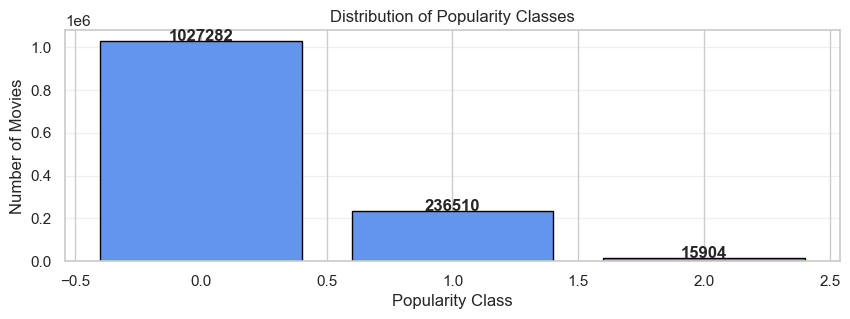

In [ ]:
df["popularity_class"] = pd.cut(
    df["popularity"],
    bins=[-1, 1, 10, df["popularity"].max()],
    labels=[0, 1, 2]  # 0 = low, 1 = medium, 2 = high
).astype("int")

plt.figure(figsize=(10,3))

# Contar cuántas películas hay por clase
class_counts = df["popularity_class"].value_counts()

# Graficar barras
plt.bar(class_counts.index, class_counts.values, color="cornflowerblue", edgecolor="black")

# Títulos y etiquetas
plt.title("Distribution of Popularity Classes")
plt.xlabel("Popularity Class")
plt.ylabel("Number of Movies")
plt.grid(True, axis="y", alpha=0.3)

# Mostrar valores sobre las barras
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha="center", fontweight="bold")

plt.show()

## Split del dataset

Se eliminan caractéristicas innecesarias (para el objetivo de este trabajo)

In [ ]:
df = df.drop(columns=['id', 'title', 'backdrop_path', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'tagline'],
             errors='ignore')
print(f"Observaciones: {df.shape[0]} | Características: {df.shape[1]}")

Observaciones: 1279696 | Características: 16


Selección de target y split del dataset

In [ ]:
# Definir la variable objetivo a predecir (clasificacion)
y = df["popularity_class"]
X = df.drop(columns=["popularity_class"])

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,          # mantiene la proporción de clases
    random_state=42
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1023756, 15)
y_train: (1023756,)
X_test: (255940, 15)
y_test: (255940,)


## Análisis de nulos

Cantidad de nulos

In [ ]:
# Cantidad de nulos por columna
nulos = X_train.isnull().sum()

# Porcentaje de nulos (sobre el total de filas)
porcentaje = (nulos / len(X_train)) * 100

# Combinar en un solo DataFrame
nulos_df = pd.DataFrame({
    'nulos': nulos,
    'porcentaje': porcentaje
})

# Ordenar de mayor a menor
nulos_df = nulos_df.sort_values(by='nulos', ascending=False)

# Mostrar
print(nulos_df)

                        nulos  porcentaje
revenue               1005743   98.240499
budget                 968233   94.576540
keywords               759314   74.169431
production_companies   572607   55.931980
production_countries   474124   46.312207
spoken_languages       456351   44.576149
genres                 430670   42.067641
runtime                300891   29.390890
release_date           191717   18.726826
vote_count                  0    0.000000
status                      0    0.000000
adult                       0    0.000000
vote_average                0    0.000000
popularity                  0    0.000000
original_language           0    0.000000


Revenue, Budget y Keywords: Se eliminan las las características por alto porcentage de nulos (> 70%)

In [ ]:
columns = ['revenue', 'budget', 'keywords'] 

X_train = X_train.drop(columns=columns, errors='ignore')
X_test = X_test.drop(columns=columns, errors='ignore')

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (1023756, 12)
X_test: (255940, 12)


Release Date: Se imputa con mediana por Status

In [ ]:
# Contar nulos en release_date por cada status
nulos_por_status = X_train.groupby("status")["release_date"].apply(lambda x: x.isna().sum())

# Contar totales por cada status
total_por_status = X_train["status"].value_counts()

# Unir ambas series en un mismo DataFrame
nulos_status_df = pd.concat([total_por_status, nulos_por_status], axis=1)
nulos_status_df.columns = ["total", "release_date_nulls"]

# Calcular el porcentaje de nulos
nulos_status_df["null_percentage"] = (nulos_status_df["release_date_nulls"] / nulos_status_df["total"] * 100).round(2)

# Mostrar resultado ordenado por porcentaje de nulos
nulos_status_df.sort_values(by="null_percentage", ascending=False)

,total,release_date_nulls,null_percentage
status,,,
Rumored,388,369,95.10
Canceled,233,218,93.56
Planned,6781,5741,84.66
Post Production,9002,5824,64.70
In Production,13585,4809,35.40
Released,993767,174756,17.59


In [ ]:
# Calcular la mediana por grupo

release_date_medians = (
    X_test[X_test["release_date"].notna()]
    .groupby("status")["release_date"]
    .median()
    .sort_values()
)

# Mostrar resultados
print(release_date_medians)

status
Released          2011-04-01 00:00:00
Canceled          2019-07-14 00:00:00
Post Production   2024-10-01 00:00:00
In Production     2025-01-01 00:00:00
Planned           2025-01-10 00:00:00
Rumored           2025-07-10 12:00:00
Name: release_date, dtype: datetime64[ns]


In [ ]:
# Imputo medianas por grupo

if X_train["release_date"].isna().any():
    X_train["release_date"] = X_train["release_date"].fillna(
        X_train["status"].map(release_date_medians)
    )

if X_test["release_date"].isna().any():
    X_test["release_date"] = X_test["release_date"].fillna(
        X_test["status"].map(release_date_medians)
    )

Runtime: Se imputa con mediana

In [ ]:
runtime_median = X_train['runtime'].median()
print(runtime_median)

X_train["runtime"] = X_train["runtime"].fillna(runtime_median)
X_test["runtime"] = X_test["runtime"].fillna(runtime_median)

66.0


Variables categóricas: Se van a codificar con OneHotEncoder, MultiLabelBinarizer y TargetEncoder.
                       No se requiere tratamiento previo.

## Análisis de outliers

Detectamos outliers en base al rango intercuartil

In [ ]:
def analizar_outliers_iqr(df, col, show_results=True):

    datos = df[col]

    # Calcular IQR
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Detectar outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = len(outliers)
    pct_outliers = n_outliers / len(df) * 100

    # Resumen
    if show_results:
        print(f"\n📊 Análisis de outliers para '{col}':")
        print(f"Q1 = {Q1:.2f} | Q3 = {Q3:.2f} | IQR = {IQR:.2f}")
        print(f"Límite inferior = {lower:.2f}")
        print(f"Límite superior = {upper:.2f}")
        print(f"Outliers detectados: {n_outliers} ({pct_outliers:.2f}%)")

    return outliers

# Para vote_count
outliers_vote_train = analizar_outliers_iqr(X_train, "vote_count")

# Para runtime
outliers_runtime_train = analizar_outliers_iqr(X_train, "runtime")



📊 Análisis de outliers para 'vote_count':
Q1 = 0.00 | Q3 = 1.00 | IQR = 1.00
Límite inferior = -1.50
Límite superior = 2.50
Outliers detectados: 140304 (13.70%)

📊 Análisis de outliers para 'runtime':
Q1 = 28.00 | Q3 = 87.00 | IQR = 59.00
Límite inferior = -60.50
Límite superior = 175.50
Outliers detectados: 18664 (1.82%)


Vote_count: Transformación logarítmica para reducir impacto

In [ ]:
X_train['vote_count'] = np.log1p(X_train['vote_count'])
X_test['vote_count'] = np.log1p(X_test['vote_count'])

analizar_outliers_iqr(X_train, "vote_count")

Runtime: Imputacion con mediana

In [ ]:
runtime_median = X_train['runtime'].median()
outliers_runtime_test = analizar_outliers_iqr(X_test, "runtime", show_results=False)

X_train.loc[outliers_runtime_train.index, 'runtime'] = runtime_median
X_test.loc[outliers_runtime_test.index, 'runtime'] = runtime_median

analizar_outliers_iqr(X_train, "runtime")


📊 Análisis de outliers para 'runtime':
Q1 = 28.00 | Q3 = 85.00 | IQR = 57.00
Límite inferior = -57.50
Límite superior = 170.50
Outliers detectados: 1850 (0.18%)


## Codificacion de categóricas

Informacion del train

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023756 entries, 1189805 to 363475
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   vote_average            1023756 non-null  float64       
 1   vote_count              1023756 non-null  float64       
 2   release_date            1023756 non-null  datetime64[ns]
 3   runtime                 1023756 non-null  float64       
 4   adult                   1023756 non-null  float64       
 5   original_language       1023756 non-null  object        
 6   popularity              1023756 non-null  float64       
 7   genres                  593086 non-null   object        
 8   production_companies    451149 non-null   object        
 9   production_countries    549632 non-null   object        
 10  spoken_languages        567405 non-null   object        
 11  status_Canceled         1023756 non-null  float64       
 12  status_In Prod

Adult: Directo a Float

In [ ]:
X_train["adult"] = X_train["adult"].astype(float)
X_test["adult"] = X_test["adult"].astype(float)

Status: OneHotEncoder

In [ ]:
status_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
status_ohe.fit(X_train[["status"]])

status_train_encoded = status_ohe.transform(X_train[["status"]])
status_test_encoded = status_ohe.transform(X_test[["status"]])

cols_encoded = status_ohe.get_feature_names_out(["status"])

X_train_status_ohe = pd.DataFrame(status_train_encoded, columns=cols_encoded, index=X_train.index)
X_test_status_ohe = pd.DataFrame(status_test_encoded, columns=cols_encoded, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=["status"]), X_train_status_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=["status"]), X_test_status_ohe], axis=1)

KeyError: "None of [Index(['status'], dtype='object')] are in the [columns]"